# Utah Avalanche Fatalities Project
Author: Victor Hurtado

## Description

This notebook is base on the final character "*Avalanche Analysis and Ploting*" of the book [Learning the Pandas Library by Matt Harrison](https://www.amazon.com/Learning-Pandas-Library-Munging-Analysis/dp/153359824X).

The data used was crawling from the [Utah Avalanche Center](https://utahavalanchecenter.org/avalanches/fatalities) website using the **Scrapy Library**, and stored in a json file. The data consist in 110 observations that correspond to fatal avalanches, and 23 variables:

* **Observer Name**: Observer name.
* **Observation Date**: Date when the avalanche was upload to the page.
* **Avalanche Date**: Date when the avalanche occur.
* **Region**: Region
* **Location Name or Route**: Location or route name.
* **Elevation**: Elevation at which the avalanche occur.                     
* **Aspect**: Aspect refers to the direction a slope faces.                
* **Slope Angle**: Slopes where the snow slid.            
* **Trigger**: Avalanches can be triggered either naturally or artificially.               
* **Trigger: additional info**: Additional information about the avalanche trigger.   
* **Avalanche Type**: Type of avalanche.               
* **Avalanche Problem**: Avalanche problems are eight types of snowpack instabilities commonly encountered in the mountains and referenced in avalanche forecasts.        
* **Weak Layer**: Weak layers are layers within the snowpack composed of snow crystals that are poorly bonded with the snow above or below them.      
* **Depth**: Depth of snowpack that slid during the avalanche.                
* **Width**: Width of snowpack that slid during the avalanche.                       
* **Vertical**: How many vertical feet the avalanche slid.                    
* **Carried**: Number of people carried by the avalanche.                    
* **Caught**: Number of people that where caught in the avalanche.                      
* **Buried - Fully**: Number of people fully buried in the avalanche.              
* **Killed**: Number of the people kill in the avalanche.                        
* **Coordinates**: Approximate latitude and longitude of the avalanche.                  
* **Buried - Partly**: Number of people partially Buried in the avalanche.             
* **Injured**: Number of people injured in the avalanche.


## Setting up the environment

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns
import numpy as np

## Import data

In [2]:
df = pd.read_json('../data/avalanche.json')

## Explore

In [3]:
df.head()

,Observer Name,Observation Date,Avalanche Date,Region,Location Name or Route,Elevation,Aspect,Slope Angle,Trigger,Trigger: additional info,...,Depth,Width,Vertical,Carried,Caught,Buried - Fully,Killed,Coordinates,Buried - Partly,Injured
0,UAC staff,"Monday, February 22, 2021","Saturday, February 20, 2021",SE Idaho » Bear Lake Area » Sherman Peak,Sherman Peak,"9,400'",East,37°,Snowmobiler,Remotely Triggered,...,3.5',450',"1,000'",1.0,1.0,1.0,1,None,NaN,NaN
1,UAC Staff,"Monday, December 16, 2019","Sunday, December 15, 2019",Salt Lake » Park City Ridgeline » Dutch Draw,Dutch Draw,"9,700'",East,40°,Snowboarder,Unintentionally Triggered,...,2',100',400',1.0,1.0,NaN,1,\n,1.0,NaN
2,"Park City Canyons Patrol, Mark Staples, Evelyn...","Tuesday, February 2, 2016","Sunday, January 31, 2016",Salt Lake » Park City Ridgeline » Pointy Peak,"near Shale Shot, in the Rip's Ridge/Pointy Pea...","9,100'",Northwest,40°,Skier,Unintentionally Triggered,...,3',45',300',1.0,1.0,1.0,1,None,NaN,NaN
3,Brett Kobernik & UAC Staff,"Friday, January 18, 2019","Friday, January 18, 2019",Skyline » Huntington Canyon » Electric Lake,Electric Lake Bowl,"9,500'",Northeast,37°,Skier,Unintentionally Triggered,...,3',500',600',1.0,1.0,1.0,1,None,NaN,NaN
4,Craig Gordon,"Sunday, February 10, 2019","Saturday, February 9, 2019",Uintas » Upper Weber Canyon » 1000 Peaks » Cha...,Blue Lake,"10,300'",Northwest,38°,Snowmobiler,Unintentionally Triggered,...,5.5',"1,000'",500',1.0,1.0,1.0,1,\n,NaN,1.0


In [4]:
print('Rows: {}\nColumns: {}'.format(df.shape[0], df.shape[1]))
print(40 * '-')
print(df.dtypes)
print(40 * '-')


Rows: 110
Columns: 23
----------------------------------------
Observer Name                object
Observation Date             object
Avalanche Date               object
Region                       object
Location Name or Route       object
Elevation                    object
Aspect                       object
Slope Angle                  object
Trigger                      object
Trigger: additional info     object
Avalanche Type               object
Avalanche Problem            object
Weak Layer                   object
Depth                        object
Width                        object
Vertical                     object
Carried                     float64
Caught                      float64
Buried - Fully              float64
Killed                        int64
Coordinates                  object
Buried - Partly             float64
Injured                     float64
dtype: object
----------------------------------------


In [5]:
# Number of null values
df.isnull().sum()

Observer Name                25
Observation Date              0
Avalanche Date                0
Region                        0
Location Name or Route       15
Elevation                    31
Aspect                       33
Slope Angle                  58
Trigger                       3
Trigger: additional info     49
Avalanche Type               45
Avalanche Problem            73
Weak Layer                   53
Depth                        38
Width                        39
Vertical                     35
Carried                      21
Caught                       20
Buried - Fully               31
Killed                        0
Coordinates                  73
Buried - Partly              82
Injured                     100
dtype: int64

In [6]:
df.describe()

,Carried,Caught,Buried - Fully,Killed,Buried - Partly,Injured
count,89.000000,90.000000,79.000000,110.000000,28.000000,10.000000
mean,1.640449,1.677778,1.215190,1.190909,1.178571,1.100000
std,1.227036,1.252663,0.673127,0.550154,0.475595,0.316228
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
50%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
75%,2.000000,2.000000,1.000000,1.000000,1.000000,1.000000
max,7.000000,7.000000,6.000000,4.000000,3.000000,2.000000


In [7]:
# The Aspect is the direction a slope faces with respect of the sun.
df.Aspect.value_counts()

Northeast    28
East         15
North        14
Northwest    11
West          3
Southeast     3
South         2
Southwest     1
Name: Aspect, dtype: int64

In [8]:
# Triggers are the potential cause of the avalanche
df.Trigger.value_counts()

Skier          47
Snowmobiler    30
Snowboarder    14
Natural         7
Hiker           4
Unknown         3
Snowshoer       2
Name: Trigger, dtype: int64

In [9]:
df['Slope Angle'].value_counts()

37°    10
38°     8
35°     6
40°     5
39°     5
36°     5
42°     3
43°     2
31°     1
10°     1
45°     1
41°     1
33°     1
47°     1
34°     1
50°     1
Name: Slope Angle, dtype: int64

In [10]:
df['Avalanche Type'].value_counts()

Hard Slab       32
Soft Slab       31
Cornice Fall     1
Wet Slab         1
Name: Avalanche Type, dtype: int64

In [11]:
# In the 'Depth' variable column we can see there are measurements made in inches("), others in feet('), and 
# we also see the present of NaN and Unknown to represent missing values.
df['Depth'].head(25)

0        3.5'
1          2'
2          3'
3          3'
4        5.5'
5          4'
6         NaN
7          3'
8         18"
9          2'
10         2'
11        16"
12       3.5'
13        NaN
14       2.5'
15         3'
16        16"
17         2'
18         2'
19         8"
20        18"
21       2.5'
22         4'
23         4'
24    Unknown
Name: Depth, dtype: object

In [12]:
df.Vertical.head(20)

0     1,000'
1       400'
2       300'
3       600'
4       500'
5     1,500'
6       300'
7       400'
8     1,250'
9       400'
10      250'
11      800'
12      400'
13      900'
14    2,500'
15      350'
16      600'
17    1,000'
18      250'
19    1,500'
Name: Vertical, dtype: object

In [13]:
df['Elevation'].head()

0     9,400'
1     9,700'
2     9,100'
3     9,500'
4    10,300'
Name: Elevation, dtype: object

## Prepare

### Convert Observation Date and Avalanche Date from Object type to Datetime.

In [14]:
df['Observation Date'] = pd.to_datetime(df['Observation Date'])
df['Avalanche Date'] = pd.to_datetime(df['Avalanche Date'])

### Convert Vertical, Depth and Elevation to numeric

In [15]:
# Convert feet and inches to meters
def to_meters(text):
    text = str(text)
    
    if text.isalpha():
        return np.nan

    # Look for thousand symbol
    if text.find(',') > -1:
        text = text.replace(",", "")
    
    # Look for the feet or inche symbol
    in_feet = text.find("\'")
    in_inches = text.find("\"")

    inches = 0
    feets = 0

    if in_feet > -1:
        feets = float(text.strip()[:in_feet])

    if (in_feet > -1) and (in_inches > -1):
        # Feet will always came first than inches
        inches = float(text[(in_feet + 1):in_inches])        
    elif in_inches > -1:
        inches = float(text.strip()[:in_inches])

    return (feets * 0.3048) + (inches * 0.0254)

In [16]:
df['Vertical'] = df['Vertical'].apply(to_meters)
df['Depth'] = df['Depth'].apply(to_meters)
df['Elevation'] = df['Elevation'].apply(to_meters)

In [17]:
df.dtypes

Observer Name                       object
Observation Date            datetime64[ns]
Avalanche Date              datetime64[ns]
Region                              object
Location Name or Route              object
Elevation                          float64
Aspect                              object
Slope Angle                         object
Trigger                             object
Trigger: additional info            object
Avalanche Type                      object
Avalanche Problem                   object
Weak Layer                          object
Depth                              float64
Width                               object
Vertical                           float64
Carried                            float64
Caught                             float64
Buried - Fully                     float64
Killed                               int64
Coordinates                         object
Buried - Partly                    float64
Injured                            float64
dtype: obje

### Create a year column

In [18]:
df['year'] = df['Avalanche Date'].dt.year

## Analysis

### Avalanche Deaths over time

In [19]:
deaths = df[df['year'] >= 1960]
deaths = deaths[['year', 'Killed']].groupby('year').sum()

deaths.reset_index(inplace=True)

deaths.head()

,year,Killed
0,1964,1
1,1965,1
2,1967,2
3,1968,1
4,1970,1


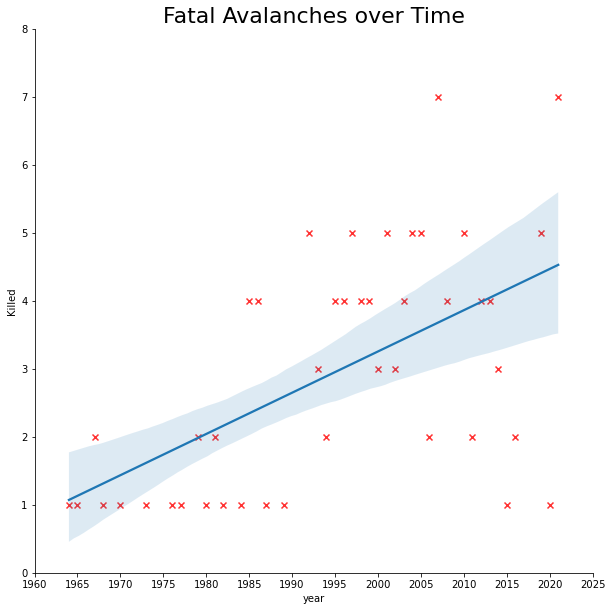

In [20]:
fig = plt.figure(figsize=(10,10))
sns.regplot(data=deaths, x='year', y='Killed', marker='x', scatter_kws={'color': 'red'})

# Set title
plt.title('Fatal Avalanches over Time', fontsize=22)

# Adjust axis interval
plt.gca().set_ylim(0, 8)
plt.gca().set_xlim(xmin=1960, xmax=2025)

# Set the x axis interval to 5
plt.gca().xaxis.set_major_locator(ticker.MultipleLocator(5))
plt.gca().xaxis.set_major_formatter(ticker.ScalarFormatter())

# Remove top and right margin
sns.despine()

### Triggers of Avalanches

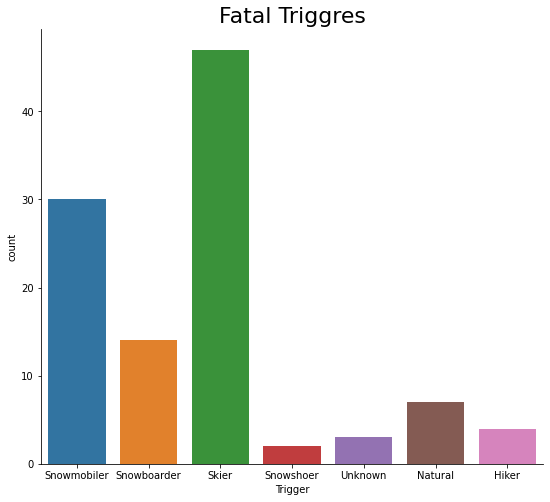

In [21]:
fig = plt.figure(figsize=(9,8))
sns.countplot(data=df, x='Trigger')

# Set title
plt.title('Fatal Triggres', fontsize=22)

# Remove top and right frame
sns.despine()

### Fatal Slope

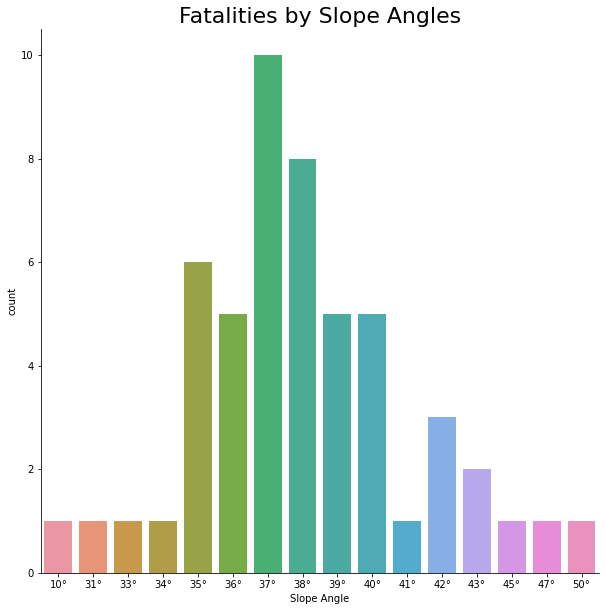

In [22]:
fig = plt.figure(figsize=(10, 10))

order = ['10°', '31°', '33°', '34°', '35°', '36°', '37°', '38°', '39°', '40°', '41°', '42°', '43°',
            '45°', '47°', '50°']

sns.countplot(data=df, x='Slope Angle', order=order)

# Set title
plt.title("Fatalities by Slope Angles", fontsize=22)

# Remove top and right frame
sns.despine()

### Fatalities by elevation

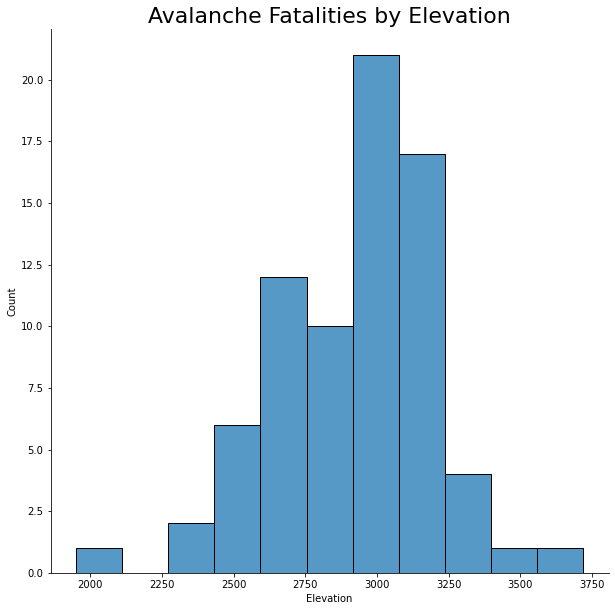

In [23]:
fig = plt.figure(figsize=(10,10))

sns.histplot(data=df, x='Elevation')

plt.title('Avalanche Fatalities by Elevation', fontsize=22)

sns.despine()

### Fatalities Heatmap

Text(0.5, 1.0, 'Fatalities by Aspect and Slope Angle')

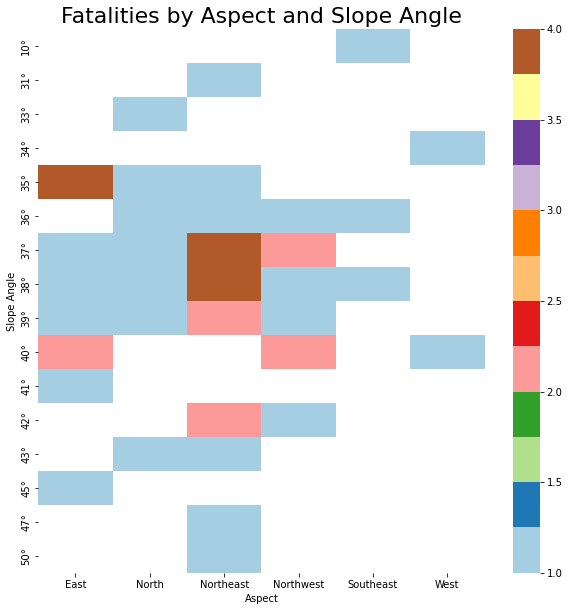

In [24]:
fig = plt.figure(figsize=(10,10))

# Prepare the data for indroduce in the heatmap function
temp = df.pivot_table(index='Slope Angle', columns='Aspect', values='Killed', aggfunc='count')

sns.heatmap(temp, cmap='Paired')

plt.title('Fatalities by Aspect and Slope Angle', fontsize=22)